# Importing Libraries

In [70]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import svm

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_score


# Loading Dataset

In [30]:
df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


# Perform EDA

In [31]:
df.shape

(2000, 26)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [33]:
# drop the 'Unnamed:0' column

df.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [68]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


# Perform Encoding on Categorical Data

In [35]:
# find unique values in cap_shape column

df['cap_shape'].unique()

array(['sunken', 'flat', 'bell', 'convex', 'conical'], dtype=object)

In [36]:
# finding unique values in all categorical columns at once

unique_values = {column: df[column].unique() for column in df.select_dtypes(include='object').columns}


In [37]:
# printing  all key value pair in unique_values dict

for key, value in unique_values.items():
    print(key, ":", value)


cap_shape : ['sunken' 'flat' 'bell' 'convex' 'conical']
cap_surface : ['scaly' 'fibrous' 'grooves' 'smooth']
cap_color : ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
bruises : ['no' 'yes']
odor : ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
gill_attachment : ['descending' 'notched' 'free' 'attached']
gill_spacing : ['distant' 'crowded' 'close']
gill_size : ['broad' 'narrow']
gill_color : ['pink' 'chocolate' 'purple' 'orange' 'buff' 'black' 'red' 'green' 'brown'
 'yellow' 'white' 'gray']
stalk_shape : ['tapering' 'enlarging']
stalk_root : ['cup' 'rooted' 'club' 'missing' 'equal' 'bulbous' 'rhizomorphs']
stalk_surface_above_ring : ['smooth' 'silky' 'scaly' 'fibrous']
stalk_surface_below_ring : ['silky' 'scaly' 'smooth' 'fibrous']
stalk_color_above_ring : ['gray' 'cinnamon' 'yellow' 'white' 'red' 'buff' 'orange' 'brown' 'pink']
stalk_color_below_ring : ['yellow' 'brown' 'gray' 'pink' 'white' 'red' 'orange' 'buff' 'cinnamon']
veil

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype='int')
list(df_encoded.columns)

In [39]:
df_encoded.head()

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,14.276173,5.054983,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,3.952715,19.068319,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.054265,7.205884,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,5.226499,20.932692,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14.037532,12.545245,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [40]:
df_encoded.shape

(2000, 105)

In [42]:
# Finding correlation btw the columns

df_encoded.corr()

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
stalk_height,1.000000,-0.003486,-0.012581,-0.000789,-0.016173,0.036380,-0.020405,0.042192,0.014377,0.041380,...,-0.009769,0.006577,-0.012438,0.030627,-0.011691,0.026259,-0.016840,-0.014310,0.043681,-0.013655
cap_diameter,-0.003486,1.000000,-0.041450,-0.037111,0.076408,0.004677,0.021816,0.032266,-0.014968,-0.000157,...,0.027782,-0.012168,-0.099478,-0.051316,-0.014271,0.035248,-0.005320,-0.009863,0.039543,-0.019707
cap_shape_conical,-0.012581,-0.041450,1.000000,-0.235330,-0.243312,-0.257259,0.045453,-0.003400,-0.042937,0.016644,...,0.045543,0.004032,-0.014530,-0.010142,0.035932,0.002265,-0.004182,-0.019595,0.028016,0.009169
cap_shape_convex,-0.000789,-0.037111,-0.235330,1.000000,-0.243312,-0.257259,-0.056228,-0.034459,0.044532,0.024782,...,-0.074076,0.075635,0.029956,-0.042548,-0.057556,-0.060589,0.097052,-0.037942,0.013653,-0.046400
cap_shape_flat,-0.016173,0.076408,-0.243312,-0.243312,1.000000,-0.265984,0.054840,-0.022599,-0.003180,0.031023,...,0.005826,-0.027849,0.037784,-0.041963,0.027856,0.075087,-0.049655,-0.008198,0.072850,0.037028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_paths,0.026259,0.035248,0.002265,-0.060589,0.075087,-0.022318,-0.017875,0.051194,0.024811,-0.084686,...,0.025576,-0.000243,-0.041558,-0.165420,-0.165751,1.000000,-0.172959,-0.161097,-0.166081,0.001584
habitat_urban,-0.016840,-0.005320,-0.004182,0.097052,-0.049655,-0.021071,0.019752,-0.029621,0.002970,-0.003330,...,-0.052954,-0.010756,0.016741,-0.179469,-0.179828,-0.172959,1.000000,-0.174778,-0.180186,-0.057435
habitat_waste,-0.014310,-0.009863,-0.019595,-0.037942,-0.008198,0.054101,0.048192,-0.078354,-0.002706,0.056186,...,-0.025483,0.081422,0.036869,-0.167160,-0.167494,-0.161097,-0.174778,1.000000,-0.167828,0.040878
habitat_woods,0.043681,0.039543,0.028016,0.013653,0.072850,-0.043443,0.012088,0.006942,-0.024757,0.038530,...,0.036137,0.017322,0.019062,-0.172332,-0.172676,-0.166081,-0.180186,-0.167828,1.000000,-0.053846


# Split Data into Train and Test

In [44]:
array = df_encoded.values

X = array[:, 0:104]
Y = array[:, 104]

In [45]:
x_train, x_test, y_train, y_test =train_test_split(X, Y, test_size=0.2, random_state=42)

In [46]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1600, 104), (1600,), (400, 104), (400,))

# Applying GridSearchCV to find best Hyperparameters

In [47]:
clf = SVC()
param_grid = [{'kernel':['rbf'], 'gamma':[50,5,10,0.5], 'C':[15,14,13,12,11,10,0.1,0.001]}]

gsv = GridSearchCV(clf, param_grid, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [48]:
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.865)

* C : Degree of tolerance/penalty term from softmargin

## Using RBF Kernel

In [49]:
# Using above Hyperparameters to find Accuracy

clf = SVC(C=15, gamma=50 ) # by default kernel = 'rbf'
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100

print('Accuracy = ', acc)
confusion_matrix(y_test, y_pred)

Accuracy =  88.5


array([[ 87,  46],
       [  0, 267]])

## Using Linear Kernel

In [50]:
clf = SVC(kernel='linear' )
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100

print('Accuracy = ', acc)
confusion_matrix(y_test, y_pred)

Accuracy =  66.75


array([[  0, 133],
       [  0, 267]])

## Using Polynomial kernel

In [51]:
clf = SVC(kernel='poly' )
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100

print('Accuracy = ', acc)
confusion_matrix(y_test, y_pred)

Accuracy =  66.75


array([[  0, 133],
       [  0, 267]])

## Using Sigmoid kernel

In [52]:
clf = SVC(kernel='sigmoid' )
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100

print('Accuracy = ', acc)
confusion_matrix(y_test, y_pred)

Accuracy =  59.0


array([[ 39,  94],
       [ 70, 197]])

## Visualizing the Prediction using Confusion Matrix

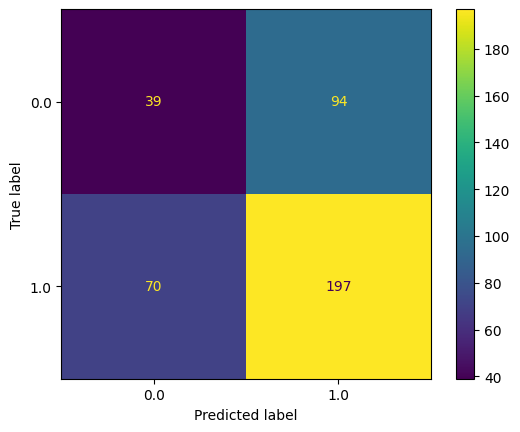

In [80]:
# from sklearn.metrics import plot_confusion_matrix is depricated

from sklearn.metrics import ConfusionMatrixDisplay

# Get predictions
y_pred = clf.predict(x_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Conclusion
* Radial Basis Function (RBF) gave the highest accuracy of 88.5%. followed by Linear kernel and polynomial kernal with similar accuracies
* Sigmoid kernal gave least accuracy of 59%

# Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

**Strengths:**

* **High accuracy:** SVM achieved an accuracy of 88.5% on the Mushroom dataset, which is comparable to other state-of-the-art machine learning algorithms.
* **Robustness to noise:** SVM is relatively robust to noise and outliers in the data, making it a good choice for datasets with noisy features.
* **Interpretability:** SVM models are relatively easy to interpret, as they can be visualized using a decision boundary. This can help to understand how the model makes predictions and to identify potential areas for improvement.

**Weaknesses:**

* **Computational cost:** SVM training can be computationally expensive, especially for large datasets.
* **Sensitivity to parameter selection:** SVM performance is sensitive to the choice of hyperparameters, such as the kernel function and regularization parameter. Selecting the optimal hyperparameters can be a time-consuming and challenging task.
* **Poor performance on imbalanced datasets:** SVM can perform poorly on imbalanced datasets, where one class is significantly larger than the other. This is because SVM tries to find a decision boundary that maximizes the margin between the two classes, which can lead to the model being biased towards the majority class.

**Visualization results:**

The visualization results show that the Mushroom dataset is linearly separable, which is ideal for SVM. The decision boundary found by SVM is able to accurately separate the two classes, with only a few misclassified points.

